### <center>ICCS 261 Term Project</center>
# <center>Meteorite Landings: Patterns and Predictions</center>
#### <center>Submitted by Parit Vacharaskunee, ID 6580209<center>

-----------

#### **Introduction to the Research Question**

Meteorite landings are intriguing natural phenomena that gives us insights on space and the solar system. The study of meteorites not only helps us understand the materials that constitute other planets but also provides clues about the early solar system and the formation of planets. This research aims to explore patterns in meteorite landings and develop classifcation models based on various characteristics such as weight, location of landing, and whether the meteorite was found or fell.

***Research Question***:
- Can meteorites be distinguished to either stone, iron, or stony iron types by its features?

This project will utilize a dataset from NASA, which includes information about meteorite landings until the year 2013. By analyzing this dataset, we aim to identify patterns and develop models that can predict the classification of meteorites based on the features.

**Resource: [NASA Meteorite Landings Dataset](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data)**

#### **Purpose and Objectives**

***Purpose***: Gain insights into the patterns and characteristics that might help distinguish the types of meteorites. Find patterns or trends that could be useful towards the study of Meteorology, which will enhance our understanding of the classification of meteorites.

***Objectives***: The main objective is to determine if the characteristics of meteorites (mass, geolocation, and its found status) can be used to distinguish the different types of meteorites. This will be done by making classification models and determine the possibility by analyzing the respective scores and performance of the models. To achive this, this research will:
1. Perform EDA's to identify patterns or trends that might help with identify the different types of meteorites.
2. Develop classification models that will identify meteorites based on given features and characteristics.
3. Further score evaluation can help see whether the model is of optimal performance or not.

----

#### **Data Cleaning and Preparation**

In [661]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [662]:
df = pd.read_csv('Meteorite_Landings_20240713.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


There are a total of 10 columns:
* name: name of the meteorites
* id: id of the meteorites
* nametype: check whether name is valid or not
* recclass: classification of the meteorites
* mass: estimated mass of the meteorites in grams (g)
* fall: determine whether the meteorite is fell or found
* year: estimated year the meteorite fell or was founded
* reclat: latitude of the site
* reclong: longitude of the site
* GeoLocation: the combined position of the site

In [663]:
df = df.drop(['id', 'nametype', 'GeoLocation'], axis = 1) # columns are insignificant/are not needed
df.isna().sum()

name           0
recclass       0
mass (g)     131
fall           0
year         291
reclat      7315
reclong     7315
dtype: int64

#### Data Cleaning

In [664]:
# Since there are a lot of missing data in reclat/reclong, a forward fill will be done as no significant average can be calculated from locations.
df[['reclat', 'reclong']] = df[['reclat', 'reclong']].fillna(method = 'ffill')

In [665]:
df.isna().sum()

name          0
recclass      0
mass (g)    131
fall          0
year        291
reclat        0
reclong       0
dtype: int64

In [666]:
df

,name,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...
45711,Zillah 002,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,L6,2167.0,Found,2003.0,49.78917,41.50460


In [667]:
len(df['recclass'].unique()) # number of classification names

466

#### Classification of Meteorites

There are [3 main types](https://en.wikipedia.org/wiki/Meteorite_classification#Rubin_classification) of meteorites: iron, stony-iron, and stony meteorites. Each of these 3 are also further classified into other names, as seen in the recclass column in the dataset. Since there are 462 unique classifications, I will regroup these names into 1 of 3 main meteorite types:

Stony:
- Carbonaceous chondrites: CI; CM; CR; CO; CV; CK; CH; Ungrouped Carbonaceous chondrite
- Ordinary chondrites: H; L; LL; HH
- Rumuruti chondrites: R
- Kakangari chondrites: K
- Enstatite chondrites: EH; EL; Ungrouped enstatite chondrites
- IAB/IIICD silicate chondrites
- Ungrouped chondrites
- Primitive achondrites: Acapulcoites; Lodranites; Winonaites; Ungrouped primitive achondrites
- Differentiated meteorites:
- Asteroidal achondrites: Eucrites; Diogenites; Howardites; Angrites; Aubrites; Ureilites; Brachinites
- Martian meteorites: Shergottites; Nakhlites; Chassigny; ALH 84001
- Lunar meteorites: Mare basalts; Impact breccias

Stony irons: 
- Pallasites
- Mesosiderites
- Ungrouped stony irons

Irons:
- Magmatic irons groups: IC; IIAB; IIC; IID; IIF; IIIAB; IIIE; IIIF; IVA; IVB
- Nonmagmatic irons groups: IAB/IIICD; IIE
- Ungrouped irons

In [668]:
uniques = pd.DataFrame(df['recclass'].unique())
# retreive classes with keyword 'iron
iron = uniques[uniques[0].str.contains('Iron')]
iron = pd.concat([iron, uniques[uniques[0].str.contains('iron')]])

# retreive classes with keywords regarding stony irons
stony_iron = uniques[uniques[0].str.contains('Pallasite')]
stony_iron = pd.concat([stony_iron, uniques[uniques[0].str.contains('Mesosiderite')]])

# dropping out irons and stony irons from the main dataset
stone = uniques.drop(iron.index).drop(stony_iron.index)

In [669]:
# renaming the names in recclass. WARNING: if cell is run twice, do a run-all. It messes up the variables of iron and stony iron.
df['recclass'] = df['recclass'].replace(iron.values, 'Iron')
df['recclass'] = df['recclass'].replace(stony_iron.values, 'Stony Iron')
df['recclass'] = df['recclass'].replace(stone.values, 'Stone')

In [670]:
df['recclass'].unique() # checking the unique names

array(['Stone', 'Iron', 'Stony Iron'], dtype=object)

A final filling of missing data will be done here on the year and mass columns based on each meteorite types. Median will be used to prevent outliers from effecting the value.

In [671]:
# get median for each type
med_st = df[df['recclass'] == 'Stone']['year'].median()
med_ir = df[df['recclass'] == 'Iron']['year'].median()
med_si = df[df['recclass'] == 'Stony Iron']['year'].median()

# fillna for each type
df.loc[(df['recclass'] == 'Stone') & (df['year'].isna()), 'year'] = med_st
df.loc[(df['recclass'] == 'Iron') & (df['year'].isna()), 'year'] = med_ir
df.loc[(df['recclass'] == 'Stony Iron') & (df['year'].isna()), 'year'] = med_si

In [672]:
mass_st = df[df['recclass'] == 'Stone']['mass (g)'].median()
mass_ir = df[df['recclass'] == 'Iron']['mass (g)'].median()
mass_si = df[df['recclass'] == 'Stony Iron']['mass (g)'].median()

df.loc[(df['recclass'] == 'Stone') & (df['mass (g)'].isna()), 'mass (g)'] = med_st
df.loc[(df['recclass'] == 'Iron') & (df['mass (g)'].isna()), 'mass (g)'] = med_ir
df.loc[(df['recclass'] == 'Stony Iron') & (df['mass (g)'].isna()), 'mass (g)'] = med_si

In [673]:
df.isna().sum()

name        0
recclass    0
mass (g)    0
fall        0
year        0
reclat      0
reclong     0
dtype: int64

----

#### **Data Exploration and Statistical Analysis: Proposal Reflection**

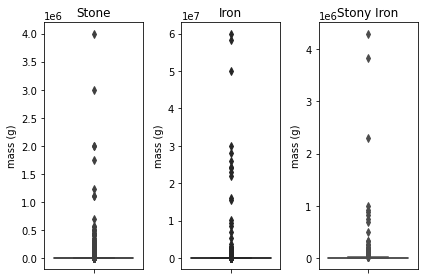

In [674]:
fig, axes = plt.subplots(1, 3, tight_layout = True)
sns.boxplot(ax = axes[0], data = df[df['recclass'] == 'Stone'], y = 'mass (g)')
sns.boxplot(ax = axes[1], data = df[df['recclass'] == 'Iron'], y = 'mass (g)', color = 'g')
sns.boxplot(ax = axes[2], data = df[df['recclass'] == 'Stony Iron'], y = 'mass (g)', color = 'r')

axes[0].set_title('Stone')
axes[1].set_title('Iron')
axes[2].set_title('Stony Iron')
plt.show()


 Stone Median: 30.6 g
 Iron Median: 8770.0 g
 Stony Iron Median: 500.0 g


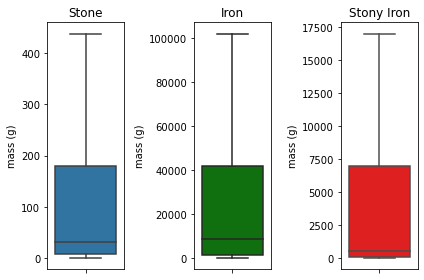

In [715]:
fig, axes = plt.subplots(1, 3, tight_layout = True)
sns.boxplot(ax = axes[0], data = df[df['recclass'] == 'Stone'], y = 'mass (g)', showfliers = False)
sns.boxplot(ax = axes[1], data = df[df['recclass'] == 'Iron'], y = 'mass (g)', showfliers = False, color = 'g')
sns.boxplot(ax = axes[2], data = df[df['recclass'] == 'Stony Iron'], y = 'mass (g)', showfliers = False, color = 'r')

axes[0].set_title('Stone')
axes[1].set_title('Iron')
axes[2].set_title('Stony Iron')

st_med = df[df['recclass'] == 'Stone']['mass (g)'].median()
ir_med = df[df['recclass'] == 'Iron']['mass (g)'].median()
si_med = df[df['recclass'] == 'Stony Iron']['mass (g)'].median()

print(f'\n Stone Median: {st_med} g\n Iron Median: {ir_med} g\n Stony Iron Median: {si_med} g')

Here we can see the average mass (disregarding outliers) of each types of meteorites. It can be seen that iron meteorites are the heaviest, followed by stony iron, and then stone. This could be a potential use towards making a classification model of each type of meteorites.

----

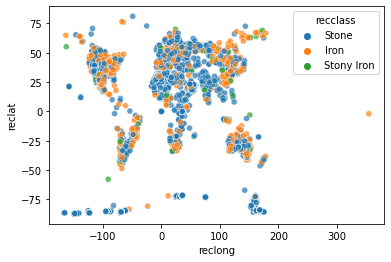

In [676]:
sns.scatterplot(x = df['reclong'], y = df['reclat'], alpha = 0.7, hue = df['recclass'])
plt.show()

The locations of the meteorites do not show any significant pattern, but could prove useful as a parameter in the model as well. By plotting a scatterplot of the geolocations, we are now able to see where in the globe a meteorite fell or is founded in. 

----

In [677]:
# separating the years by type
fallen_st = df[df['recclass'] == 'Stone']
fallen_ir = df[df['recclass'] == 'Iron']
fallen_si = df[df['recclass'] == 'Stony Iron']

In [678]:
# counting the number of meteors in each year
years_st = pd.DataFrame(fallen_st['year'].value_counts())
years_ir = pd.DataFrame(fallen_ir['year'].value_counts())
years_si = pd.DataFrame(fallen_si['year'].value_counts())

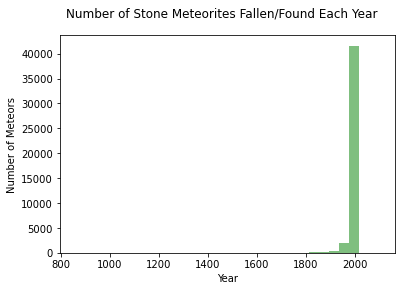

Median: 1998.0


In [679]:
# plotting a histogram to see the distribution
fig, ax = plt.subplots()
fig.suptitle("Number of Stone Meteorites Fallen/Found Each Year")
ax.hist(fallen_st['year'], bins = 30, alpha = 0.5, color = 'green')
ax.set(xlabel = 'Year', ylabel = "Number of Meteors")
plt.show()
print('Median:', fallen_st['year'].median())

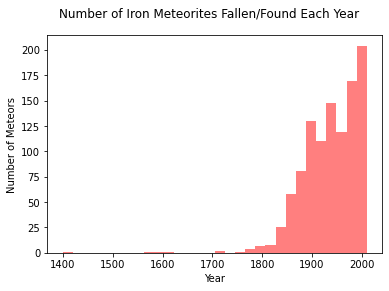

Median: 1941.0


In [680]:
fig, ax = plt.subplots()
fig.suptitle("Number of Iron Meteorites Fallen/Found Each Year")
ax.hist(fallen_ir['year'], bins = 30, alpha = 0.5, color = 'red')
ax.set(xlabel = 'Year', ylabel = "Number of Meteors")
plt.show()
print('Median:', fallen_ir['year'].median())

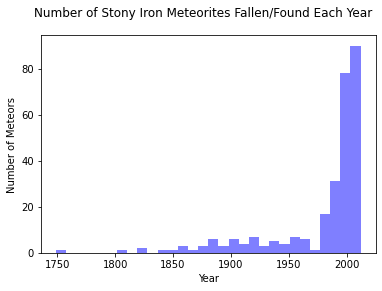

Median: 2002.0


In [681]:
fig, ax = plt.subplots()
fig.suptitle("Number of Stony Iron Meteorites Fallen/Found Each Year")
ax.hist(fallen_si['year'], bins = 30, alpha = 0.5, color = 'blue')
ax.set(xlabel = 'Year', ylabel = "Number of Meteors")
plt.show()
print('Median:', fallen_si['year'].median())

From above, iron meteorites are fallen/founded with the lowest average year of 1943. However, there is not that much of a difference between stone and stony iron meteorites. However, since the distribution and number of values are different, it could still prove beneficial towards the model.

----

#### **Models**

**Random Forest Model #1: Classification of Meteorites**

In [682]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Get Independent Variables that will be used in the model

In [683]:
fell = pd.get_dummies(df['fall']).drop(columns = 'Found')

x = pd.DataFrame(df['mass (g)'])
x['reclat'] = df['reclat']
x['reclong'] = df['reclong']
x['fell'] = fell
x['year'] = df['year']
x

,mass (g),reclat,reclong,fell,year
0,21.0,50.77500,6.08333,1,1880.0
1,720.0,56.18333,10.23333,1,1951.0
2,107000.0,54.21667,-113.00000,1,1952.0
3,1914.0,16.88333,-99.90000,1,1976.0
4,780.0,-33.16667,-64.95000,1,1902.0
...,...,...,...,...,...
45711,172.0,29.03700,17.01850,0,1990.0
45712,46.0,13.78333,8.96667,0,1999.0
45713,3.3,49.25000,17.66667,0,1939.0
45714,2167.0,49.78917,41.50460,0,2003.0


Get y Variables for Training

In [684]:
y = df.recclass
y

0             Stone
1             Stone
2             Stone
3             Stone
4             Stone
            ...    
45711         Stone
45712    Stony Iron
45713         Stone
45714         Stone
45715         Stone
Name: recclass, Length: 45716, dtype: object

In [685]:
# split train-test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 10)

Feature: 0, Score: 0.34340
Feature: 1, Score: 0.18391
Feature: 2, Score: 0.18487
Feature: 3, Score: 0.06362
Feature: 4, Score: 0.22420


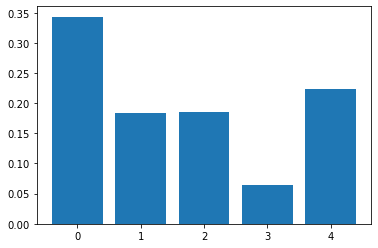

In [686]:
# fitting random forest model with tree size of 100
rf_model = RandomForestClassifier(n_estimators=100)
_ = rf_model.fit(xtrain, ytrain)

# get importance to see which variables are most important when evaluating
importance = rf_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Since the fell column is not significant, it will be removed in further models.

Confusion Matrix for Visualization

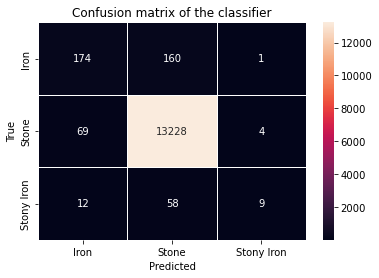

In [687]:
# plotting confusion matrix
cm = confusion_matrix(ytest, rf_model.predict(xtest))

labels = ['Iron', 'Stone', 'Stony Iron']
sns.heatmap(cm, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels, yticklabels = labels)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluating Test Scores

In [688]:
yhat_test = rf_model.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, yhat_test)}')
precision_recall_fscore_support(ytest, yhat_test)

Accuracy: 0.9778344877870945


(array([0.68235294, 0.983787  , 0.64285714]),
 array([0.51940299, 0.99451169, 0.11392405]),
 array([0.58983051, 0.98912028, 0.19354839]),
 array([  335, 13301,    79], dtype=int64))

The model is able to distinguish stone from the other, but fails to do so for iron and stony iron. It could also be possible that since there is so much more stone meteorites, it outweighs the other two types which causes a bad yield on the other two. Now let's try a model without stones.

----

**Random Forest Model #2: Classifying Stony Iron and Iron Meteorites**

In [689]:
df2 = pd.concat([df[df['recclass'] == 'Stony Iron'], df[df['recclass'] == 'Iron']])

Get Independent Variables

In [690]:
x2 = pd.DataFrame(df2['mass (g)'])
x2['reclat'] = df2['reclat']
x2['reclong'] = df2['reclong']
x2['year'] = df2['year']

Get y Variable for Testing

In [691]:
y2 = df2.recclass

In [692]:
# split train-test
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size = 0.3, random_state = 5)

# fit model
rf_model2 = RandomForestClassifier(n_estimators=100)
_ = rf_model2.fit(xtrain2, ytrain2)

Confusion Matrix for Evaluation

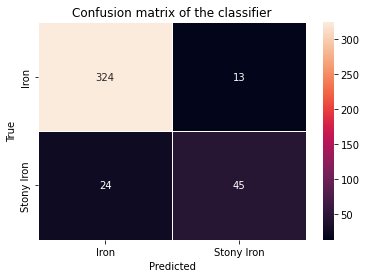

In [693]:
# plotting confusion matrix
cm2 = confusion_matrix(ytest2, rf_model2.predict(xtest2))

labels2 = ['Iron', 'Stony Iron']
sns.heatmap(cm2, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels2, yticklabels = labels2)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluating Scores

In [694]:
yhat_test2 = rf_model2.predict(xtest2)
print(f'Accuracy: {accuracy_score(ytest2, yhat_test2)}')
precision_recall_fscore_support(ytest2, yhat_test2)

Accuracy: 0.9088669950738916


(array([0.93103448, 0.77586207]),
 array([0.96142433, 0.65217391]),
 array([0.9459854 , 0.70866142]),
 array([337,  69], dtype=int64))

According to the model above, by removing stone meteorites, the model was able to perform much better on distinguishing 2 types. Iron class has very high scores over 0.90, while stony irons has 0.8, 0.61, and 0.69 for precision, recall, and f1, respectively.

----

**Random Forest Model #3: Classifying Stone and Iron Meteorites**

For additional information, I will be creating a model between iron and stone meteorites as well as the model tend to perform well to distinguish these two types.

In [695]:
df3 = pd.concat([df[df['recclass'] == 'Stone'], df[df['recclass'] == 'Iron']])

In [696]:
x3 = pd.DataFrame(df3['mass (g)'])
x3['reclat'] = df3['reclat']
x3['reclong'] = df3['reclong']
x3['year'] = df3['year']

In [697]:
y3 = df3.recclass

In [698]:
# split train-test
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3, y3, test_size = 0.3, random_state = 100)

# fit model
rf_model3 = RandomForestClassifier(n_estimators=100, class_weight = "balanced") 
_ = rf_model3.fit(xtrain3, ytrain3)

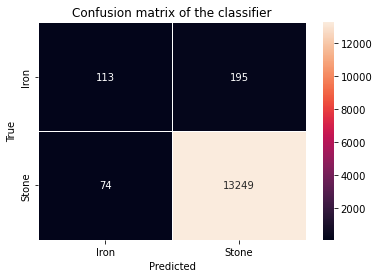

In [699]:
# plotting confusion matrix
cm3 = confusion_matrix(ytest3, rf_model3.predict(xtest3))

labels3 = ['Iron', 'Stone']
sns.heatmap(cm3, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels3, yticklabels = labels3)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [700]:
yhat_test3 = rf_model3.predict(xtest3)
print(f'Accuracy: {accuracy_score(ytest3, yhat_test3)}')
precision_recall_fscore_support(ytest3, yhat_test3)

Accuracy: 0.9802655711246424


(array([0.60427807, 0.98549539]),
 array([0.36688312, 0.9944457 ]),
 array([0.45656566, 0.98995031]),
 array([  308, 13323], dtype=int64))

Like above, the model is only able to fit the stone meteorites really well due to the number of data values. Hence, the weighted parameter will be added, and outliers will be removed.

----
**Random Forest Model #4: Classifying Meteorites without Outliers with Weighted Parameters**

Now, let's try removing outliers manually for each types of meteorites by computing for the IQR and removing values that falls outside of it.

In [701]:
# stones
stone_sub = df[df['recclass'] == 'Stone']
iron_sub = df[df['recclass'] == 'Iron']
stonyiron_sub = df[df['recclass'] == 'Stony Iron']

# calculate IQR
stone_IQR = stone_sub['mass (g)'].quantile(0.75) - stone_sub['mass (g)'].quantile(0.25)
iron_IQR = iron_sub['mass (g)'].quantile(0.75) - iron_sub['mass (g)'].quantile(0.25)
stonyiron_IQR = stonyiron_sub['mass (g)'].quantile(0.75) - stonyiron_sub['mass (g)'].quantile(0.25)

# get outliers
stone_outliers = stone_sub.loc[(stone_sub['mass (g)'] < (stone_sub['mass (g)'].quantile(0.25) - 1.5 * stone_IQR)) | (df['mass (g)'] > (stone_sub['mass (g)'].quantile(0.75) + 1.5 * stone_IQR))]
iron_outliers = iron_sub.loc[(iron_sub['mass (g)'] < (iron_sub['mass (g)'].quantile(0.25) - 1.5 * iron_IQR)) | (df['mass (g)'] > (iron_sub['mass (g)'].quantile(0.75) + 1.5 * iron_IQR))]
stonyiron_outliers = stonyiron_sub.loc[(stonyiron_sub['mass (g)'] < (stonyiron_sub['mass (g)'].quantile(0.25) - 1.5 * stonyiron_IQR)) | (df['mass (g)'] > (stonyiron_sub['mass (g)'].quantile(0.75) + 1.5 * stonyiron_IQR))]

In [702]:
# get new dataframe
df_no_outliers = df.drop(stone_outliers.index).drop(iron_outliers.index).drop(stonyiron_outliers.index)
df_no_outliers

,name,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,Stone,21.0,Fell,1880.0,50.77500,6.08333
16,Akyumak,Iron,50000.0,Fell,1981.0,39.91667,42.81667
17,Al Rais,Stone,160.0,Fell,1957.0,24.41667,39.51667
22,Alby sur Chéran,Stone,252.0,Fell,2002.0,45.82133,6.01533
37,Northwest Africa 5815,Stone,256.8,Found,1998.0,0.00000,0.00000
...,...,...,...,...,...,...,...
45709,Zhongxiang,Iron,100000.0,Found,1981.0,31.20000,112.50000
45711,Zillah 002,Stone,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,Stony Iron,46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,Stone,3.3,Found,1939.0,49.25000,17.66667


In [703]:
x4 = pd.DataFrame(df_no_outliers['mass (g)'])
x4['reclat'] = df_no_outliers['reclat']
x4['reclong'] = df_no_outliers['reclong']
x4['year'] = df_no_outliers['year']
x4

,mass (g),reclat,reclong,year
0,21.0,50.77500,6.08333,1880.0
16,50000.0,39.91667,42.81667,1981.0
17,160.0,24.41667,39.51667,1957.0
22,252.0,45.82133,6.01533,2002.0
37,256.8,0.00000,0.00000,1998.0
...,...,...,...,...
45709,100000.0,31.20000,112.50000,1981.0
45711,172.0,29.03700,17.01850,1990.0
45712,46.0,13.78333,8.96667,1999.0
45713,3.3,49.25000,17.66667,1939.0


In [704]:
y4 = df_no_outliers.recclass

In [705]:
# split train-test
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4, y4, test_size = 0.3, random_state = 10)

In [706]:
# fitting random forest model with tree size of 100
rf_model4 = RandomForestClassifier(n_estimators=100, class_weight='balanced')
_ = rf_model4.fit(xtrain4, ytrain4)

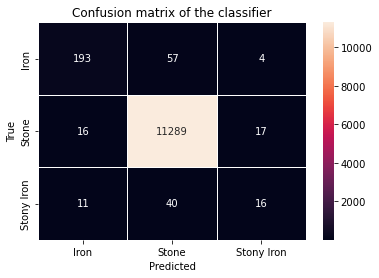

In [707]:
# plotting confusion matrix
cm4 = confusion_matrix(ytest4, rf_model4.predict(xtest4))

labels4 = ['Iron', 'Stone', 'Stony Iron']
sns.heatmap(cm4, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels4, yticklabels = labels4)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [708]:
yhat_test4 = rf_model4.predict(xtest4)
print(f'Accuracy: {accuracy_score(ytest4, yhat_test4)}')
precision_recall_fscore_support(ytest4, yhat_test4)

Accuracy: 0.9875461650777291


(array([0.87727273, 0.99148077, 0.43243243]),
 array([0.75984252, 0.99708532, 0.23880597]),
 array([0.81434599, 0.99427515, 0.30769231]),
 array([  254, 11322,    67], dtype=int64))

By removing the outliers, the scores for the other 2 types were able to improve. However, the score for stony irons seems to still be low. This is potentially because its characteristics is between irons and stones, making it hard for the model to distinguish between.

----
**Random Forest Model #4.5: Revisiting Previous Model**

For model 4.5, lets revisit model 3 to try out between only iron and stones but with no outliers and with weight parameters.

In [709]:
df4_5 = pd.concat([df_no_outliers[df_no_outliers['recclass'] == 'Stone'], df_no_outliers[df_no_outliers['recclass'] == 'Iron']])

In [710]:
x4_5 = pd.DataFrame(df4_5['mass (g)'])
x4_5['reclat'] = df4_5['reclat']
x4_5['reclong'] = df4_5['reclong']
x4_5['year'] = df4_5['year']

In [711]:
y4_5 = df4_5.recclass

In [712]:
# split train-test
xtrain4_5, xtest4_5, ytrain4_5, ytest4_5 = train_test_split(x4_5, y4_5, test_size = 0.3, random_state = 0)

# fit model
rf_model4_5 = RandomForestClassifier(n_estimators=100, class_weight = "balanced") 
_ = rf_model4_5.fit(xtrain4_5, ytrain4_5)

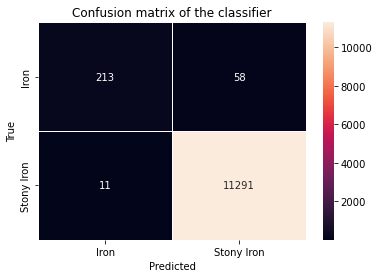

In [713]:
# plotting confusion matrix
cm4_5 = confusion_matrix(ytest4_5, rf_model4_5.predict(xtest4_5))

labels4_5 = ['Iron', 'Stony Iron']
sns.heatmap(cm4_5, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels4_5, yticklabels = labels4_5)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [714]:
yhat_test4_5 = rf_model4_5.predict(xtest4_5)
print(f'Accuracy: {accuracy_score(ytest4_5, yhat_test4_5)}')
precision_recall_fscore_support(ytest4_5, yhat_test4_5)

Accuracy: 0.9940378467121749


(array([0.95089286, 0.99488942]),
 array([0.78597786, 0.99902672]),
 array([0.86060606, 0.99695378]),
 array([  271, 11302], dtype=int64))

From the scores above, this model seems to perform really well between stones and irons. By removing outliers and adding weight parameters into these 2 types, the model is able to perform quite well in separating meteorites into 2 of these classes. This suggests that there are distinct features between stones and irons.

------

#### **Interpretation and Analysis**

**Summary of Data**

The data that was used to make each EDA and models is a cleaned version of the original data obtained by NASA's dataset in the link above. The missing data was cleaned in multiple ways: forward filling for the geolocations, as this does not have much significance, and the mass was filled with the median value as the distribution is skewed. Furthermore, it can be seen that meteorites are divided into 3 main types: stones, irons, and stony irons. Since the recclass column in the dataset shows the subtypes of these 3, each subtypes were re-classified into one of the 3 main types to help simplify the classification of each meteorites.

**Summary of EDA**
EDA shown above was to try to observe and find categories that might fit well with the classifier model. It is seen that when plotting the side by side box plot for the weights of each types, the median and ranges of the 3 types are very . Plotting the geolocation of the meteorites did not show any signs of distiguishable features, but it could potentially help predict the meteorites baseed on its relative latitude and longitude.

**Summary of Models**
5 (4.5) models were made for the sake of optimizing the performance results of the classification. Each models were slightly changed to fit different scenarios:

**All models were done with the following variables:**
* Independent Variables: mass, latitude, longitude, if the meteor was fallen or found (later removed due to insignificance), the year it was found

* Dependent/Testing Variable: class type of the meteorite

**Models**
1. Classification of Meteorites
2. Classification between Stony Iron and Iron Meteorites
3. Classification between Stone and Iron Meteorites
4. Classification without Outliers

    4.5 Model 3 without Outliers

#### **Conclusion**
Overall, the models with the best scores on all of its respective classes are models 2 and 4.5. After observation, the model struggles to distinguish between meteorites with characteristics close to 2 types, such as stones and stony irons. Since model 2 only compares between iron and stony iron, the model was able to perform better, and for model 4.5, by removing the outliers, we can see some changes in the performance between stone and iron that yielded better performance scores than the previous model that was done with outliers and without the weight parameter. In short, 2 models were able to perform decently on the classification of meteorites: model 2 classifying between stony iron and iron meteorites, and model 4.5 classifying between stone and iron meteorites. This suggests that meteorites can be classified into its types based on its features such as weight, landing locations, and the year it was found. However, since the model is only limited to classifying between the main types, it might not prove useful to classifying a more subclass type, which might require further experiments or investigation by researchers and scientists.